# K-Means Clustering - Customer Segmentation Analysis

This notebook demonstrates K-Means clustering, one of the most popular unsupervised machine learning algorithms. We'll use a customer dataset with Age and Income information to:

1. **Understand the data** through visualization
2. **Apply K-Means clustering** to segment customers
3. **Compare results** with and without feature scaling
4. **Visualize cluster centroids** and analyze the results

**Dataset**: Customer income data with Age and Income($) features
**Goal**: Segment customers into meaningful groups for targeted marketing


## 1. Data Loading and Initial Exploration

Let's start by loading our customer dataset and examining its structure. This dataset contains customer information that we'll use to identify distinct customer segments.


In [1]:
import pandas as pd
from matplotlib import pyplot as plt

df = pd.read_csv('income.csv')
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


## 2. Initial Data Visualization

Before applying any clustering algorithm, it's crucial to visualize our data to understand:
- **Data distribution**: How are customers spread across age and income?
- **Natural groupings**: Can we visually identify potential clusters?
- **Outliers**: Are there any unusual data points?

The scatter plot shows the relationship between customer age and income. We can observe some natural groupings that K-Means should be able to identify.


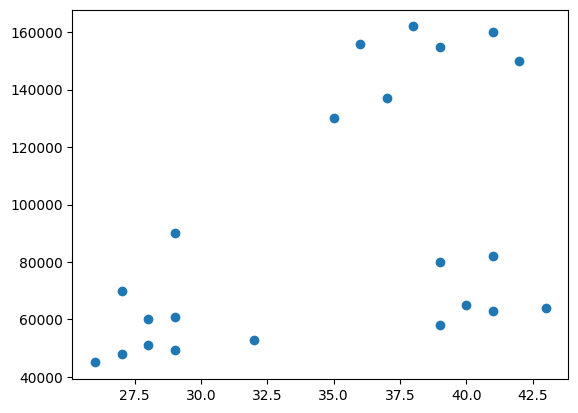

In [2]:
plt.scatter(df['Age'], df['Income($)'])
plt.show()

## 3. Applying K-Means Clustering (Without Scaling)

Now let's apply K-Means clustering with k=3 clusters. We're choosing 3 clusters based on visual inspection of the data, but in practice, you'd use methods like the elbow method or silhouette analysis to determine optimal k.

**Key Parameters:**
- `n_clusters=3`: We want to segment customers into 3 groups
- `n_init='auto'`: Let scikit-learn choose the number of initializations automatically

**Note**: We're applying K-Means directly to the raw data without scaling first.


In [3]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3, n_init='auto')
km.fit(df[['Age', 'Income($)']])

,n_clusters,3
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,None
,copy_x,True
,algorithm,'lloyd'


## 4. Understanding Cluster Labels

K-Means assigns each data point to one of k clusters (0, 1, 2 in our case). The `labels_` attribute contains the cluster assignment for each customer.

**Cluster Labels Interpretation:**
- **0, 1, 2**: Cluster identifiers (arbitrary numbers)
- Each customer gets assigned to exactly one cluster
- Customers in the same cluster are more similar to each other than to customers in other clusters


In [4]:
km.labels_

array([0, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0],
      dtype=int32)

## 5. Adding Cluster Information to Dataset

We add the cluster assignments back to our original dataset so we can:
- **Analyze cluster characteristics**: What defines each customer segment?
- **Visualize results**: Color-code our scatter plot by cluster
- **Business interpretation**: Understand what each cluster represents

Now each customer has a cluster label that we can use for targeted marketing strategies.


In [5]:
df['Cluster'] = km.labels_
df.head()

,Name,Age,Income($),Cluster
0,Rob,27,70000,0
1,Michael,29,90000,2
2,Mohan,29,61000,0
3,Ismail,28,60000,0
4,Kory,42,150000,1


## 6. Visualizing Clustering Results

The colored scatter plot reveals how K-Means has segmented our customers:

**Cluster Analysis:**
- **Different colors** represent different customer segments
- **Cluster boundaries** show how K-Means separates the data
- **Cluster shapes** tend to be roughly circular (K-Means assumption)

**Potential Business Interpretation:**
- **Young, Low Income** (one cluster)
- **Middle-aged, High Income** (another cluster)  
- **Mixed Age, Medium Income** (third cluster)

However, notice that the clusters might not be optimal due to the scale difference between Age and Income...


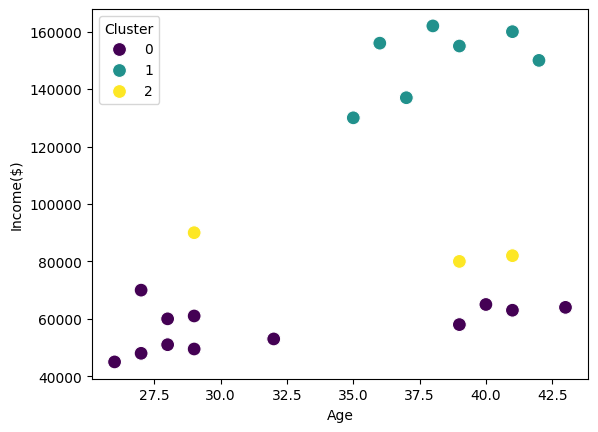

In [6]:
import seaborn as sns

sns.scatterplot(df, x='Age', y='Income($)', hue='Cluster', palette='viridis', s=100)
plt.show()

## 7. The Importance of Feature Scaling

**Problem with Raw Data:**
K-Means uses Euclidean distance to measure similarity. When features have different scales:
- **Income** ranges from ~$50,000 to $200,000
- **Age** ranges from ~20 to 65

**Impact**: Income dominates the distance calculation because its values are much larger than Age values.

**Solution**: Scale features to the same range using MinMaxScaler, which transforms features to a 0-1 range.

**Formula**: scaled_value = (value - min) / (max - min)


In [7]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

df_scaled = pd.DataFrame(columns=['Age', 'Income($)'])
df_scaled[['Age', 'Income($)']] = scaler.fit_transform(df[['Age', 'Income($)']])
df_scaled.head()

,Age,Income($)
0,0.058824,0.213675
1,0.176471,0.384615
2,0.176471,0.136752
3,0.117647,0.128205
4,0.941176,0.897436


After MinMaxScaler transformation:
- **All features** now range between 0 and 1
- **Age and Income** contribute equally to distance calculations
- **Relative relationships** are preserved

**Example**: A 27-year-old with $70,000 income becomes approximately (0.06, 0.21) in scaled space.

This ensures that both age and income have equal influence on cluster formation.


## 9. K-Means on Scaled Data

Now we apply K-Means to the scaled features. Notice how the cluster assignments might differ from the unscaled version:

**Why Scaling Matters:**
- **Balanced influence**: Both age and income contribute equally
- **Better cluster boundaries**: More meaningful customer segments
- **Improved results**: Clusters reflect true customer similarities

Compare the cluster assignments with the previous unscaled results!


In [8]:
km = KMeans(n_clusters=3, n_init='auto')
km.fit(df_scaled[['Age', 'Income($)']])

df_scaled['Cluster'] = km.labels_
df_scaled.head()

,Age,Income($),Cluster
0,0.058824,0.213675,1
1,0.176471,0.384615,1
2,0.176471,0.136752,1
3,0.117647,0.128205,1
4,0.941176,0.897436,0


## 10. Understanding Cluster Centroids

**Centroids** are the center points of each cluster - they represent the "average" customer in each segment.

**Centroid Interpretation** (in scaled space):
- **Cluster 0**: [0.85, 0.20] → Older customers with lower income
- **Cluster 1**: [0.14, 0.12] → Younger customers with lower income  
- **Cluster 2**: [0.72, 0.90] → Older customers with higher income

**Business Value**: These centroids help us understand the characteristics of each customer segment for targeted marketing.


In [9]:
centroids = km.cluster_centers_
centroids

array([[0.72268908, 0.8974359 ],
       [0.1372549 , 0.11633428],
       [0.85294118, 0.2022792 ]])

## 11. Final Visualization: Clusters with Centroids

This final plot shows:
- **Colored points**: Customers colored by their cluster assignment
- **Red stars**: Cluster centroids (the "center" of each customer segment)

**Key Insights:**
1. **Clear separation**: Scaled features produce more distinct clusters
2. **Meaningful segments**: Each cluster represents a logical customer group
3. **Centroid positions**: Show the typical customer profile for each segment

**Business Applications:**
- **Targeted marketing**: Different strategies for each segment
- **Product recommendations**: Customize offerings by cluster
- **Customer acquisition**: Focus on high-value segments


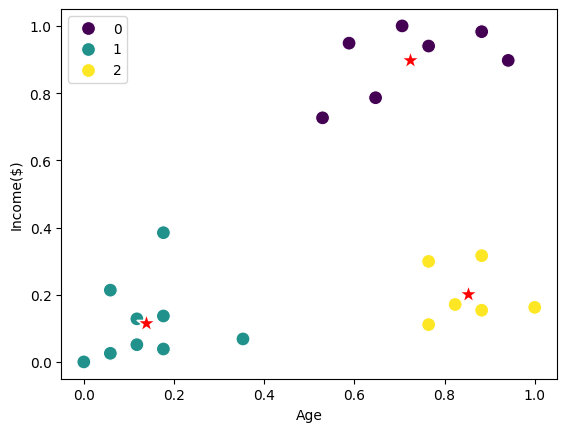

In [10]:
import seaborn as sns

sns.scatterplot(df_scaled, x='Age', y='Income($)', hue='Cluster', palette='viridis', s=100)
sns.scatterplot(x=centroids[:,0], y=centroids[:,1], s=200, color='red', marker="*")
plt.show()

In [11]:
sse = []

k_rng = range(1, 10)

for k in k_rng:
    km = KMeans(n_clusters=k, n_init='auto')
    km.fit(df_scaled[['Age', 'Income($)']])
    sse.append(km.inertia_)
sse

[5.434011511988179,
 2.091136388699078,
 0.4750783498553096,
 0.368773407644059,
 0.2963623258321304,
 0.2522119125653639,
 0.1812215383031342,
 0.15270536286861378,
 0.14787328926491383]

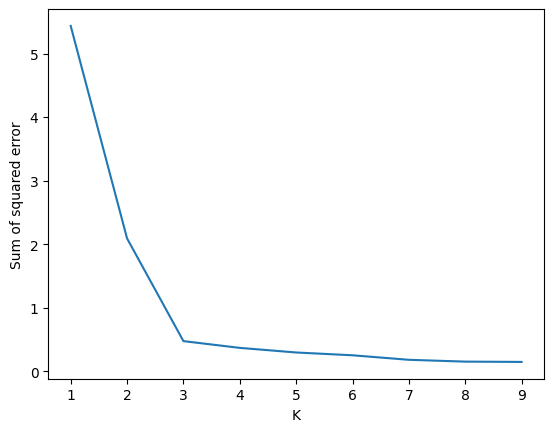

In [12]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng, sse)
plt.show()

## 12. Key Takeaways and Next Steps

**What We Learned:**
1. **K-Means clustering** can effectively segment customers into meaningful groups
2. **Feature scaling** is crucial when features have different scales
3. **Visualization** helps validate and interpret clustering results
4. **Centroids** provide actionable insights about each customer segment

**Comparison: Scaled vs Unscaled:**
- **Unscaled**: Income dominated, less meaningful clusters
- **Scaled**: Balanced features, clearer customer segments

**Next Steps:**
- **Determine optimal k** using elbow method or silhouette analysis
- **Profile clusters** with additional customer attributes
- **Validate segments** with business domain knowledge
- **Implement targeting strategies** based on cluster characteristics

**Business Impact:**
Each cluster represents a distinct customer segment that can be targeted with specific marketing strategies, product recommendations, and service offerings.
